# Ensemble Alpha + CORDEX models' error metrics:

In [1]:
version = '7'

In [2]:
# Load auxiliar functions and configurations
filename = 'utils_v{}.ipynb'.format(version)
%run $filename

In [3]:
# Configurations
print('cordex_output_path', cordex_output_path)
print('temp_output_path', temp_output_path)
print('temp_obs_col', temp_obs_col)
print('models_cols', models_cols)
print('ens_alpha_col', ens_alpha_col)

cordex_output_path ..\data\cordex\output
temp_output_path ..\data\observations\temp\output
temp_obs_col 17
models_cols [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
ens_alpha_col 19


### Loading the data from file - JJA

In [4]:
df_all_jja = load_csv2df('cordex_join_obs_jja.csv', cordex_output_path, freq_index='3H')

In [5]:
df_all_jja.head()

0          1          2          3          4   \
date                                                                         
1979-06-01 00:00:00  13.419122  14.471643  14.328729  13.729150  13.672754   
1979-06-01 03:00:00  12.501764  14.402551  12.254663  14.001581  13.041925   
1979-06-01 06:00:00  11.911584  13.907617  11.871179  13.747766  12.438898   
1979-06-01 09:00:00  15.474115  17.524805  18.803857  15.239832  16.544214   
1979-06-01 12:00:00  17.844873  19.986719  24.058984  16.716211  21.106104   

                            5          6          7          8          9   \
date                                                                         
1979-06-01 00:00:00  10.644250  12.337183  10.969507  16.211725  19.048730   
1979-06-01 03:00:00   9.791833  11.918695  10.839319  15.977960  18.184839   
1979-06-01 06:00:00   9.561914  12.052179  10.406824  16.152734  17.723444   
1979-06-01 09:00:00  12.460474  14.724603  15.226221  22.113336  21.220728   
1979-06-01 12:00:00  13.730859  18.498956  18.569238  27.650629  25.784845   

                            10         11         12         13         14  \
date                                                                         
1979-06-01 00:00:00  14.766718  16.977441  12.107019  14.522089  15.005762   
1979-06-01 03:00:00  15.022180  16.634790  11.559991  14.790338  14.716455   
1979-06-01 06:00:00  13.791528  16.666528  11.469415  15.098444  14.315088   
1979-06-01 09:00:00  16.057153  18.326074  15.713953  17.690302  15.798486   
1979-06-01 12:00:00  17.785272  20.640039  18.421106  20.991083  21.013086   

                            15         16         17  
date                                                  
1979-06-01 00:00:00  15.043542  10.745996  12.933333  
1979-06-01 03:00:00  14.938684  11.698389  12.233333  
1979-06-01 06:00:00  15.044244  13.068018  11.933333  
1979-06-01 09:00:00  15.259332  16.350977  15.533333  
1979-06-01 12:00:00  16.919702  19.115137  18.900000

### Bias

In [6]:
df_bias, bias_probe = metric_by_hour(bias, df_all_jja, models_cols, temp_obs_col)
df_bias

0         3         6         9         12        15        18  \
0   3.173077  3.244701  3.102307  0.138143 -0.566790  0.060153  2.059582   
1   2.798174  2.642605  2.608311  1.588672  1.098164  1.595302  2.640710   
2   3.804242  3.776693  3.609801  1.126428  0.572473  1.054781  2.829259   
3   3.832040  3.844031  3.776727  0.802762 -0.315608  0.098281  2.271436   
4   1.987199  1.903393  1.955293  0.733659 -0.265139  0.130909  1.352160   
5   4.001785  3.922351  3.732435  0.713191 -0.568453 -0.095355  2.232747   
6   3.070081  2.867499  2.803410  1.729961  2.078479  2.993745  3.602463   
7   4.559024  4.594899  4.411300  1.848695  1.717458  2.332272  3.604662   
8   2.824792  2.417544  2.145275 -1.096938 -1.885744 -0.281331  2.415371   
9   1.165678  1.073030  1.089178  0.045322 -0.563182 -0.086314  0.854287   
10  1.507480  1.370051  1.353127  0.128162  0.116653  0.847920  1.723777   
11  2.312112  2.313862  2.216087 -0.632227 -1.747942 -1.329558  0.798466   
12  1.897212  1.783605  1.778940 -0.234874 -2.254422 -2.053558 -0.219995   
13  2.786950  2.459977  2.190561 -1.573115 -2.250368 -0.131301  2.149216   
14  1.715881  1.588752  1.563114  0.302689 -0.544274  0.029993  1.291307   
15  1.533545  1.431624  1.413258 -1.181408 -3.600167 -3.276886 -0.955232   
16  2.391562  2.344002  2.089791 -0.836460 -1.517260 -0.809062  1.316047   

          21  
0   3.238458  
1   3.033765  
2   3.986171  
3   3.936903  
4   2.089588  
5   4.065412  
6   3.692967  
7   4.543711  
8   3.626108  
9   1.348936  
10  2.106159  
11  2.400309  
12  1.842180  
13  3.414095  
14  1.891656  
15  1.455031  
16  2.604269

In [7]:
# list of 8 hours
# each item is a an array of 17 (models) + observations average diurnal cycle
len(bias_probe), len(bias_probe[0]), bias_probe[0]

(8, 18, 0     16.580253
 1     16.955157
 2     15.949089
 3     15.921291
 4     17.766131
 5     15.751545
 6     16.683249
 7     15.194307
 8     16.928538
 9     18.587653
 10    18.245850
 11    17.441218
 12    17.856119
 13    16.966381
 14    18.037449
 15    18.219786
 16    17.361769
 17    19.753331
 dtype: float64)

In [8]:
avg_diurnal_bias(bias_probe)

19
0   2.668284
3   2.563448
6   2.461113
9   0.211921
12 -0.617419
15  0.063529
18  1.762721
21  2.898572

### Sigma score - Normalized standard deviation measure

In [9]:
df_sigma, sigma_probe = metric_by_hour(sigma_score, df_all_jja, models_cols, temp_obs_col)
df_sigma

0         3         6         9         12        15        18  \
0   1.050750  1.087355  1.112521  1.435211  1.565933  1.441874  1.207767   
1   1.039253  1.087320  1.160489  1.180689  1.212188  1.144428  1.074712   
2   0.977166  1.031273  1.069242  1.308870  1.522615  1.426324  1.191208   
3   0.838903  0.854562  0.882253  1.118658  1.303322  1.224752  1.054334   
4   1.095157  1.134675  1.188673  1.192632  1.138203  1.090760  1.062944   
5   0.880214  0.913772  0.942832  1.184569  1.291355  1.180599  1.034312   
6   1.124459  1.180563  1.292719  1.553842  1.448871  1.286950  1.202600   
7   1.080766  1.151689  1.295819  1.656752  1.711445  1.541504  1.299678   
8   1.061846  1.128994  1.135278  1.296248  1.455373  1.293854  0.990327   
9   1.077942  1.101345  1.151618  1.209338  1.172786  1.114008  1.108821   
10  0.930397  0.957521  1.003166  1.140404  1.118367  1.055735  1.006920   
11  0.958725  0.990517  1.018827  1.297327  1.454404  1.358493  1.178461   
12  1.074817  1.113997  1.177324  1.290859  1.350631  1.245757  1.212960   
13  0.896276  0.990374  1.033623  1.211446  1.323828  1.030976  0.839974   
14  0.930571  0.967134  1.025250  1.042334  1.054822  1.003309  0.939818   
15  0.857003  0.890748  0.941533  1.007445  1.118905  1.055896  0.990967   
16  0.766007  0.829647  0.857126  1.073024  1.226469  1.097931  0.910185   

          21  
0   1.069317  
1   1.037061  
2   0.978346  
3   0.860873  
4   1.075859  
5   0.900710  
6   1.116961  
7   1.098788  
8   0.926979  
9   1.092734  
10  0.922318  
11  0.989321  
12  1.108908  
13  0.773930  
14  0.918063  
15  0.883338  
16  0.751989

In [10]:
# a list of 8 hours
# each item is a std array of 17 (models) + observations diurnal cycle

len(sigma_probe), len(sigma_probe[0]), sigma_probe[0].shape, sigma_probe[0]

(8, 18, (18,), 0     3.102174
 1     3.068230
 2     2.884930
 3     2.476730
 4     3.233279
 5     2.598693
 6     3.319788
 7     3.190791
 8     3.134934
 9     3.182454
 10    2.746849
 11    2.830486
 12    3.173229
 13    2.646114
 14    2.747364
 15    2.530168
 16    2.261514
 17    2.952343
 dtype: float64)

In [11]:
avg_diurnal_sigma(sigma_probe)

19
0   0.978838
3   1.024205
6   1.075782
9   1.247038
12  1.321736
15  1.211362
18  1.076823
21  0.970912

### Perkins skill score

In [12]:
df_perkins, perkins_probe = metric_by_hour(perkins_skill_score, df_all_jja, models_cols, temp_obs_col)
df_perkins

0          3          6          9          12         15  \
0   51.288245  50.402576  51.127214  82.085346  76.811594  81.602254   
1   56.481481  56.924316  57.165862  71.457327  85.225443  80.877617   
2   44.685990  44.243156  44.444444  77.375201  77.053140  77.415459   
3   38.204509  38.486312  36.473430  82.689211  86.714976  88.929147   
4   64.613527  63.607085  62.962963  79.790660  89.412238  89.452496   
5   40.217391  39.371981  40.499195  87.721417  86.473430  91.223833   
6   59.219002  60.869565  61.835749  66.908213  68.639291  65.539452   
7   42.793881  40.619968  42.351047  66.908213  68.397746  70.450886   
8   55.072464  59.017713  62.479871  81.763285  76.570048  85.708535   
9   76.690821  78.180354  77.375201  87.681159  89.331723  89.291465   
10  74.436393  76.006441  75.201288  90.861514  91.505636  86.352657   
11  62.479871  62.560386  61.030596  84.219002  76.127214  81.602254   
12  68.156200  68.760064  67.954911  85.104670  70.571659  77.536232   
13  54.025765  57.125604  60.587762  72.020934  74.959742  94.162641   
14  71.175523  71.296296  71.175523  92.069243  91.586151  93.800322   
15  74.557166  73.631240  73.752013  76.892110  54.991948  63.727858   
16  62.882448  63.365539  66.425121  77.536232  76.368760  86.553945   

           18         21  
0   72.987118  51.006441  
1   67.793881  54.267311  
2   66.344605  43.196457  
3   70.209340  41.425121  
4   80.072464  64.694042  
5   73.349436  42.149758  
6   60.064412  52.858293  
7   63.526570  45.048309  
8   68.800322  47.906602  
9   83.333333  73.429952  
10  75.925926  66.787440  
11  83.896940  62.077295  
12  87.520129  69.565217  
13  72.866345  47.624799  
14  83.333333  69.766506  
15  86.594203  76.650564  
16  85.265700  60.628019

In [13]:
# list of 8 hours
# each item is a df with the pdfs for each model (bins 50)
# needed the pdfs for the observations
len(perkins_probe), perkins_probe[0].shape, perkins_probe[0]

(8,
 (50, 18),
           0         1         2         3         4         5         6   \
 0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 6   0.000000  0.000000  0.000805  0.000000  0.000000  0.000403  0.000000   
 7   0.000000  0.000000  0.001208  0.000403  0.000000  0.000000  0.000805   
 8   0.002415  0.000000  0.003221  0.000403  0.000000  0.000000  0.002013   
 9   0.009662  0.000000  0.008052  0.002013  0.000000  0.006039  0.008052   
 10  0.012480  0.004026  0.016506  0.006441  0.002013  0.018921  0.019324   
 11  0.028583  0.030998  0.036634  0.020531  0.008052  0.0438

In [14]:
avg_diurnal_perkins(perkins_probe)

19
0   59.178744
3   59.808658
6   60.125983
9   86.312399
12  81.976414
15  87.790092
18  78.230084
21  57.468978

### Yule-Kendall skewness 

In [15]:
df_yk, yk_probe = YK_skewness_by_hour(df_all_jja, models_cols, temp_obs_col)
df_yk

0         3         6         9         12        15        18  \
0  -0.092427 -0.155724 -0.207710 -0.108897 -0.070803 -0.056429 -0.021665   
1  -0.062701 -0.065944 -0.042349 -0.114120 -0.095898 -0.074238 -0.047438   
2  -0.201048 -0.249676 -0.231963 -0.130104 -0.034626 -0.047289 -0.015944   
3  -0.002910 -0.136004 -0.196592 -0.060436 -0.045831 -0.024061  0.036033   
4   0.017165  0.037137  0.040334  0.010009 -0.026683 -0.045761  0.002373   
5  -0.225203 -0.255637 -0.258049 -0.167952 -0.092828 -0.083616 -0.060610   
6  -0.238728 -0.251706 -0.260901 -0.099116  0.046699  0.027176 -0.048733   
7  -0.336504 -0.338861 -0.361370 -0.241045 -0.070222 -0.106501 -0.180507   
8   0.027299  0.034707  0.032599 -0.047465 -0.025877  0.066095  0.032334   
9   0.016250  0.001293 -0.003446  0.033211  0.001232 -0.013584  0.034759   
10 -0.021289 -0.049005 -0.070047  0.002719  0.048560  0.092270  0.093636   
11 -0.052836 -0.147688 -0.178312 -0.063305 -0.033397 -0.066097  0.014738   
12 -0.034224 -0.027272 -0.011391 -0.038368 -0.111031 -0.126189 -0.057495   
13 -0.072569 -0.051678 -0.034075 -0.056072  0.014981 -0.015517 -0.012567   
14 -0.001340  0.006975 -0.009593 -0.016353 -0.020280  0.006791  0.015570   
15 -0.035682 -0.050529 -0.036747 -0.009418 -0.053242 -0.082890 -0.000021   
16 -0.293084 -0.356205 -0.349280 -0.242846 -0.132783 -0.142329 -0.063290   

          21  
0  -0.027699  
1  -0.071401  
2  -0.099555  
3   0.046740  
4   0.016771  
5  -0.149833  
6  -0.191687  
7  -0.284473  
8   0.023450  
9   0.028073  
10  0.009142  
11  0.011980  
12 -0.030574  
13 -0.085602  
14  0.002135  
15  0.014706  
16 -0.156989

In [16]:
avg_diurnal_yk(yk_probe)

19
0  -0.092353
3  -0.116080
6  -0.123744
9  -0.083558
12 -0.042513
15 -0.042811
18 -0.019606
21 -0.056645

In [17]:
# list of 8 hours
# each item is df with perc (5%, 50%, 95%) array of 17 (models) + observations diurnal cycle
len(yk_probe), len(yk_probe[0]), yk_probe[0]

(8, 3,             0          1          2          3          4          5   \
 5%   11.924860  12.414612  11.539032  12.566113  13.431262  11.560754   
 50%  16.305902  16.648462  15.838403  15.577051  17.125848  15.712305   
 95%  22.828636  23.356812  20.965369  20.999329  24.078619  20.428186   
 
             6          7          8          9          10         11  \
 5%   11.531535   9.929327  12.815538  14.312317  14.599211  13.404759   
 50%  16.649408  15.327386  16.319269  18.007715  17.845041  17.088770   
 95%  22.307321  20.234314  23.062503  24.947998  23.462207  23.048865   
 
             12         13         14         15         16         17  \
 5%   13.466583  13.198677  14.379926  14.731721  13.760144  15.766667   
 50%  17.401773  16.684152  17.710107  17.915979  17.422266  19.283333   
 95%  24.025470  22.093320  23.727856  23.259027  21.053467  25.656667   
 
             19  
 5%   12.915669  
 50%  16.798814  
 95%  22.581135  )

## Metrics for all seasons

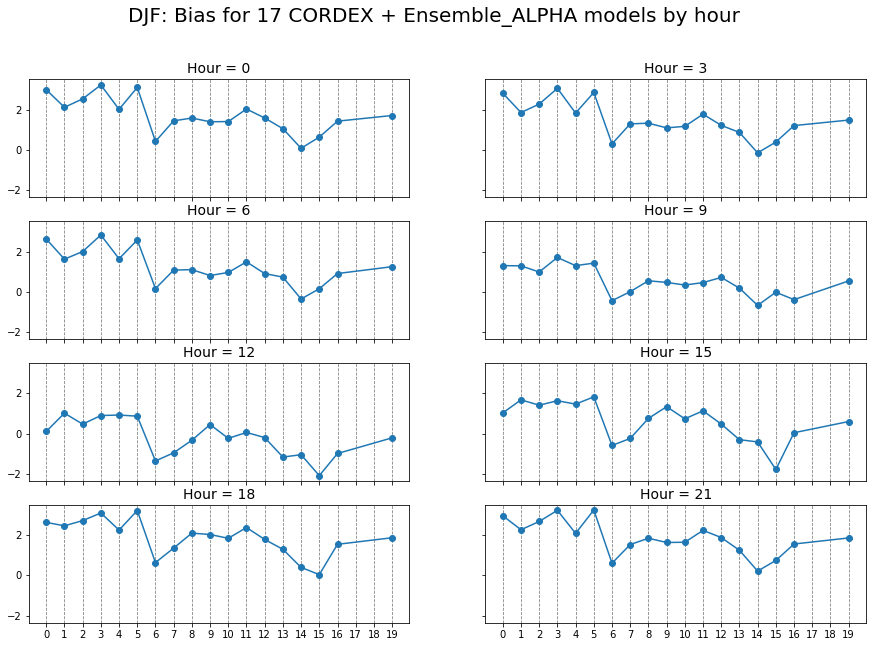

..\plots\output\metrics_ensembles


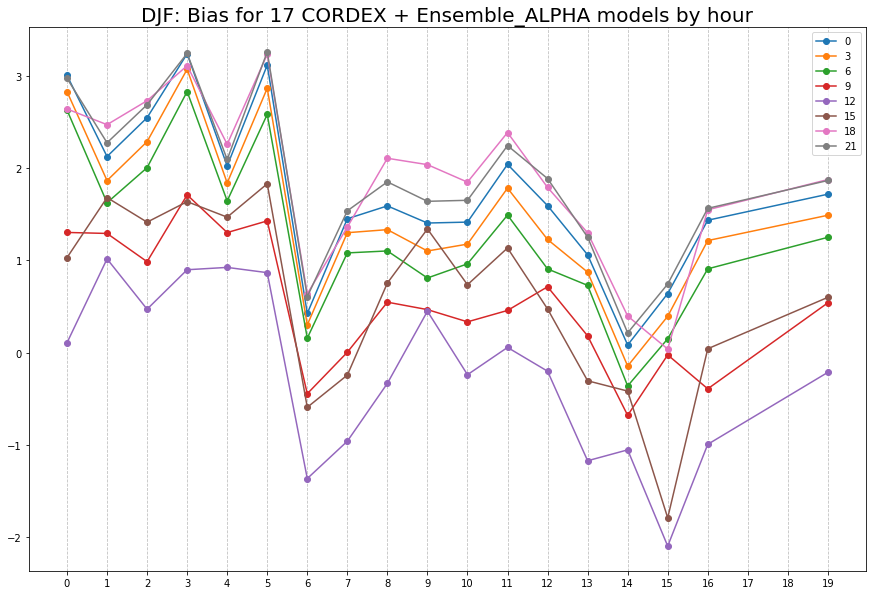

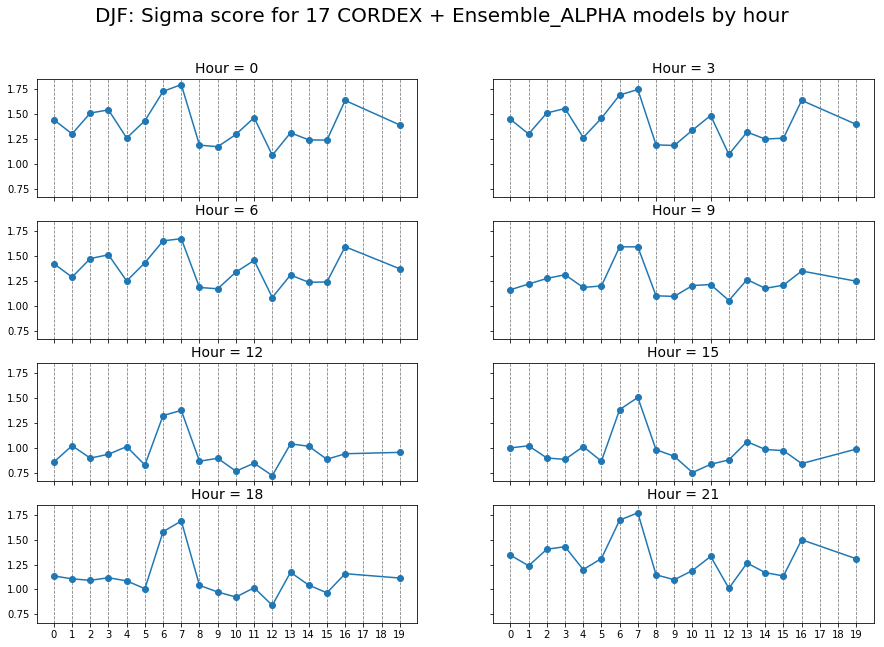

..\plots\output\metrics_ensembles


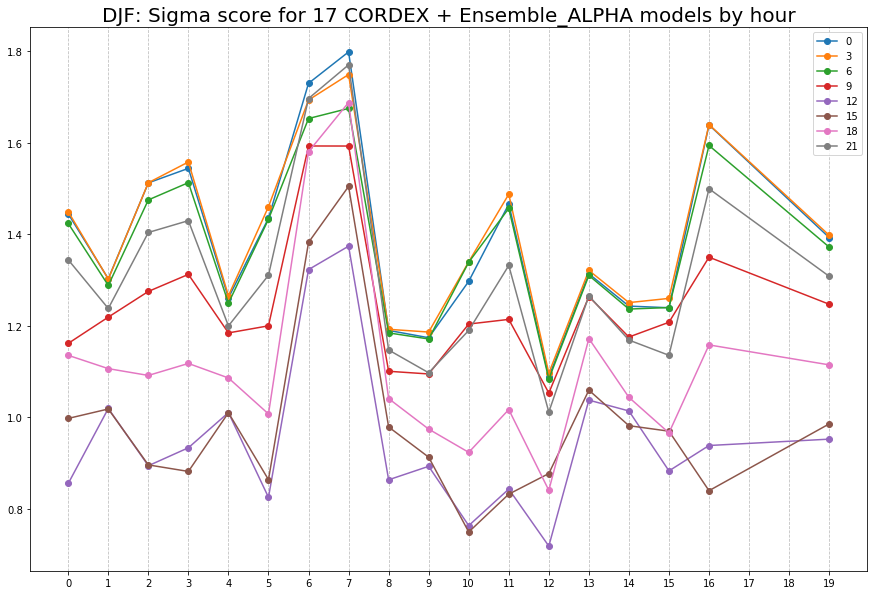

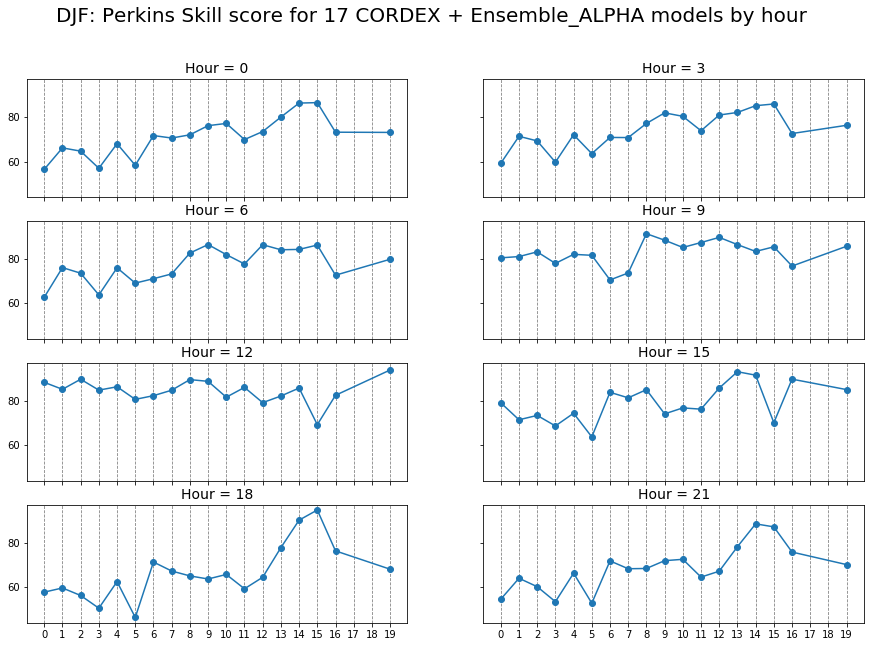

..\plots\output\metrics_ensembles


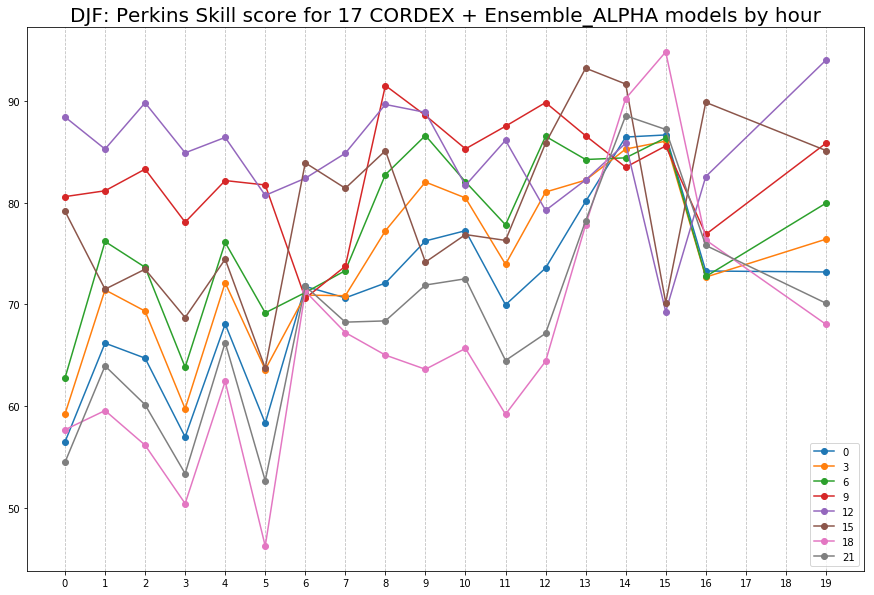

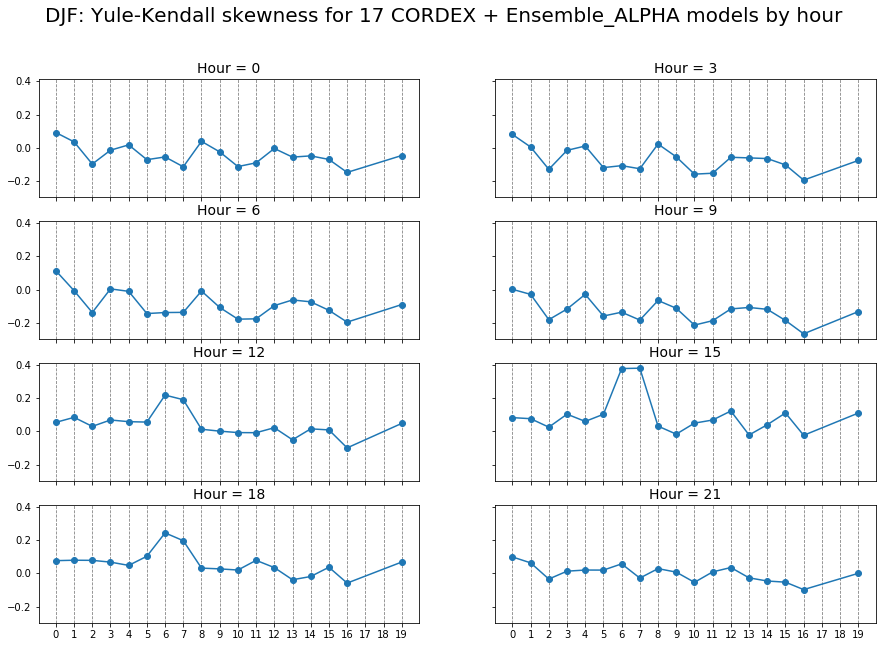

..\plots\output\metrics_ensembles


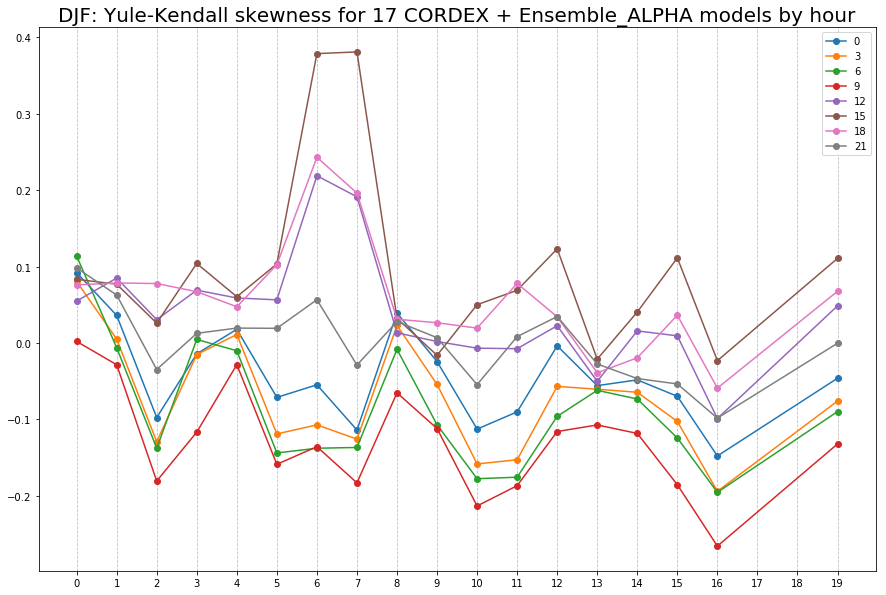

In [18]:
metrics_models_ensemblesALPHA('cordex_join_obs_djf.csv', 'DJF', cordex_output_path, 'CORDEX',
                             models_cols, temp_obs_col, ens_alpha_col,
                             plot=True, sub_folder='metrics_ensembles');

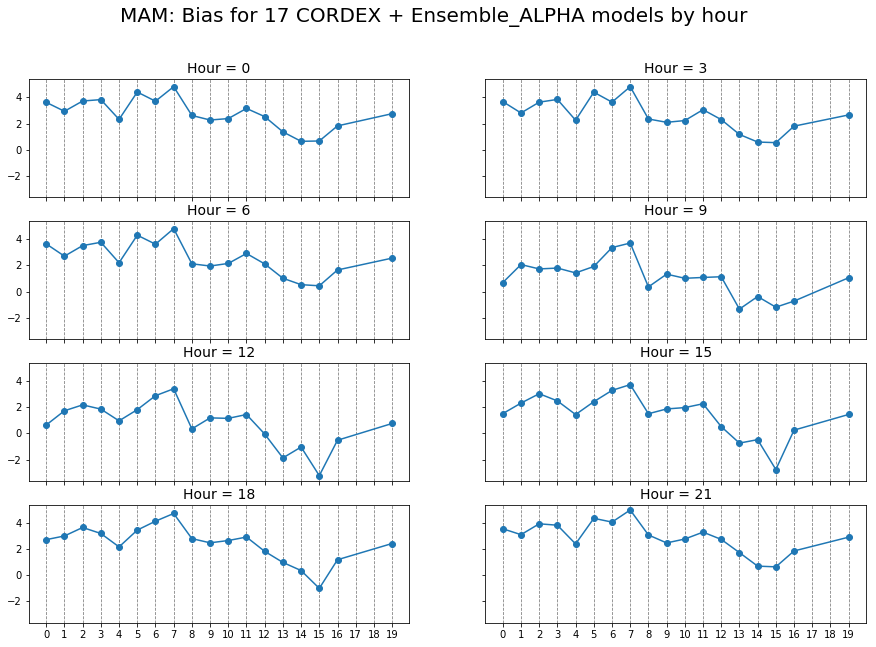

..\plots\output\metrics_ensembles


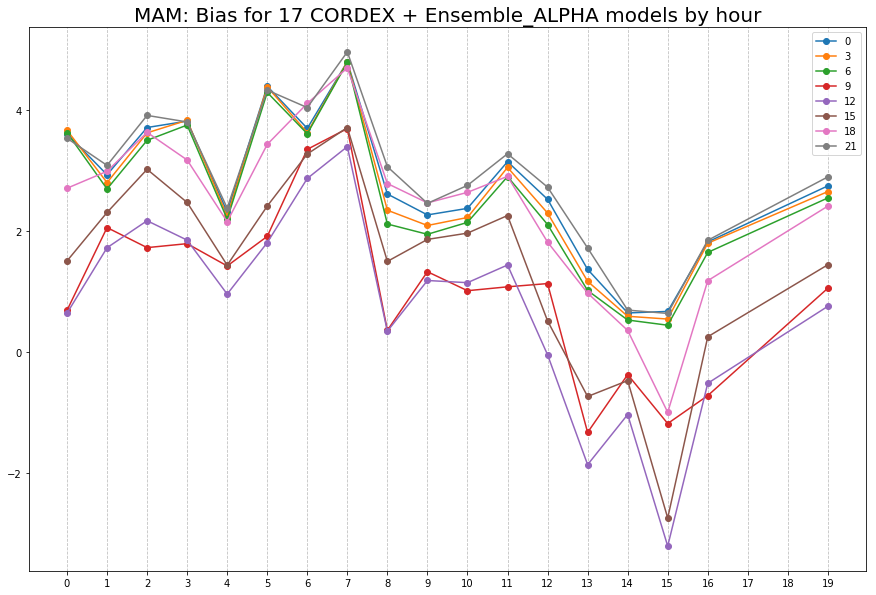

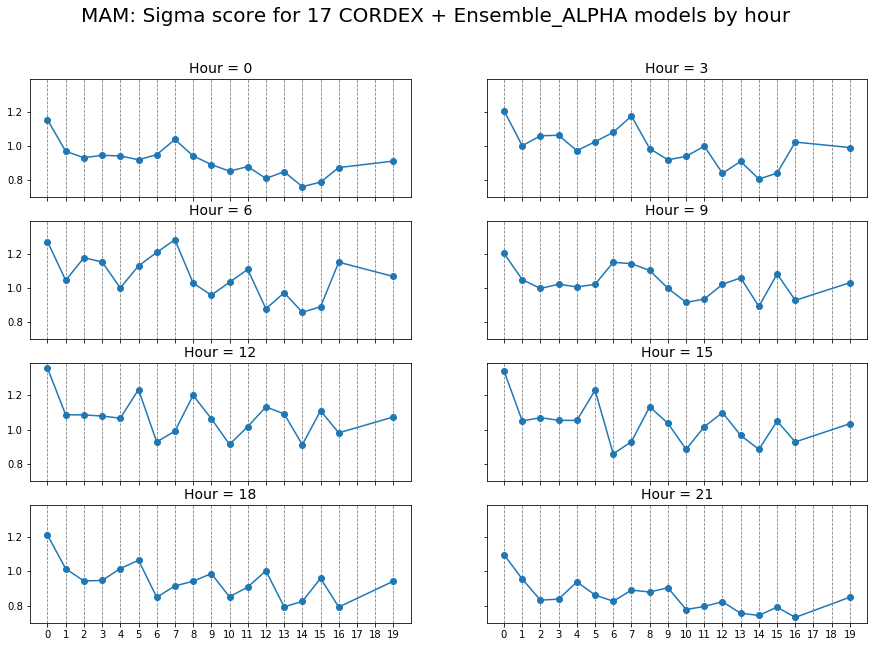

..\plots\output\metrics_ensembles


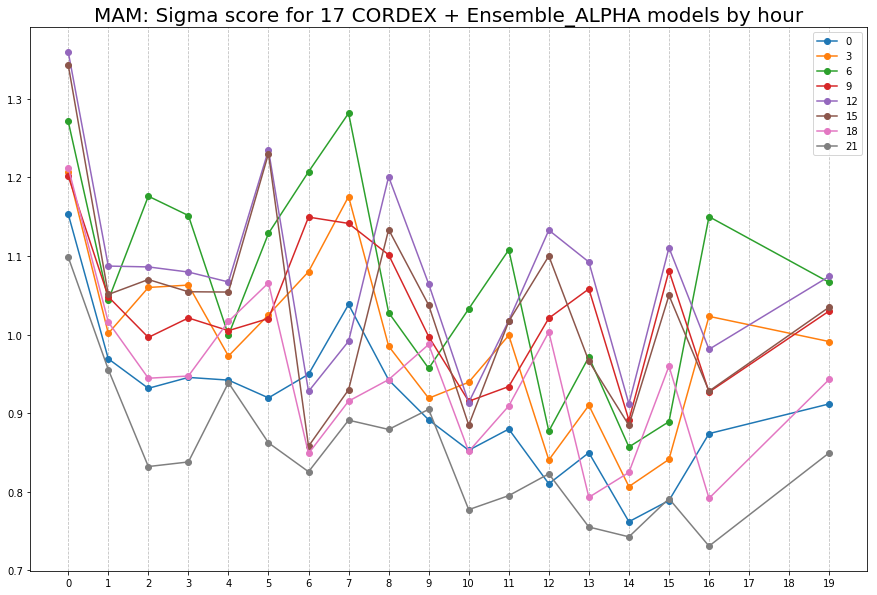

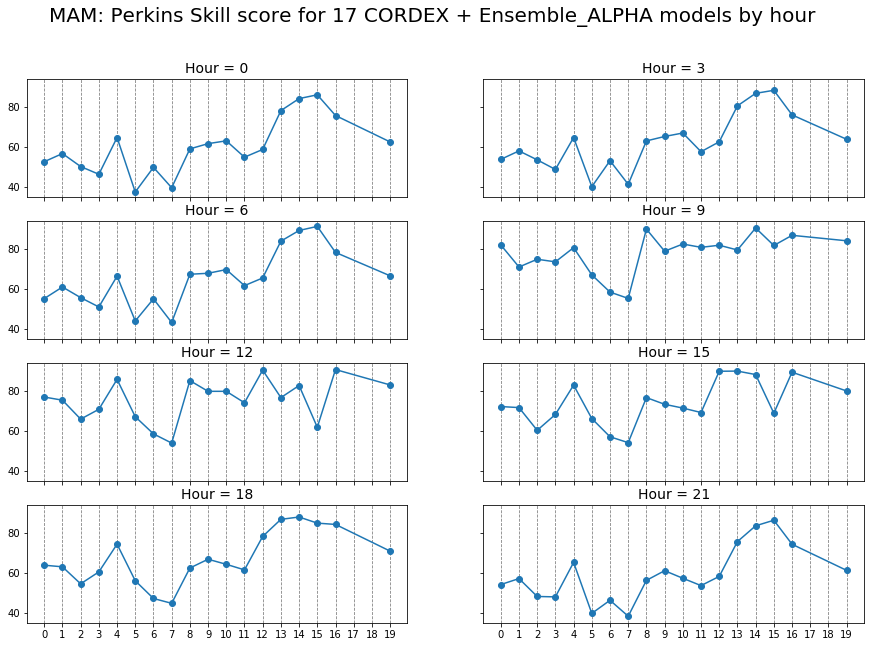

..\plots\output\metrics_ensembles


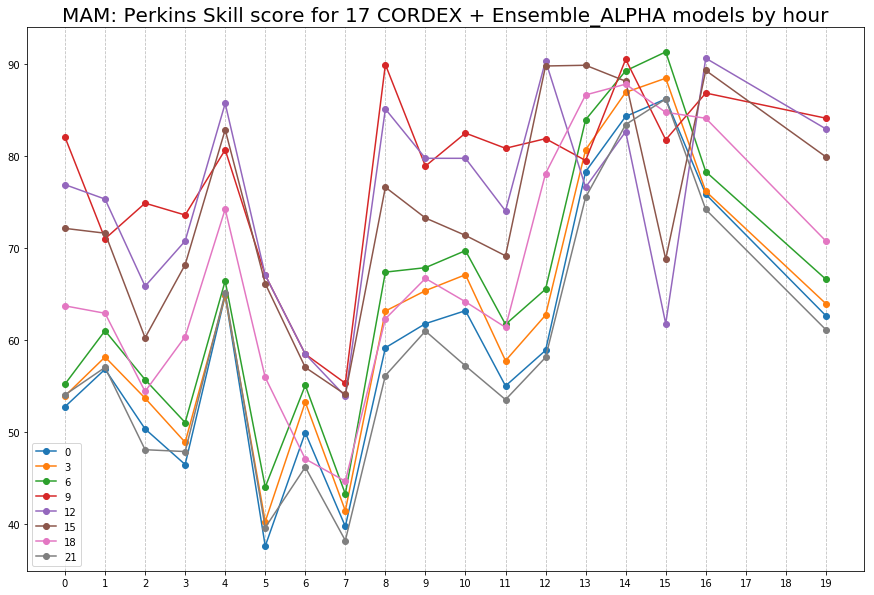

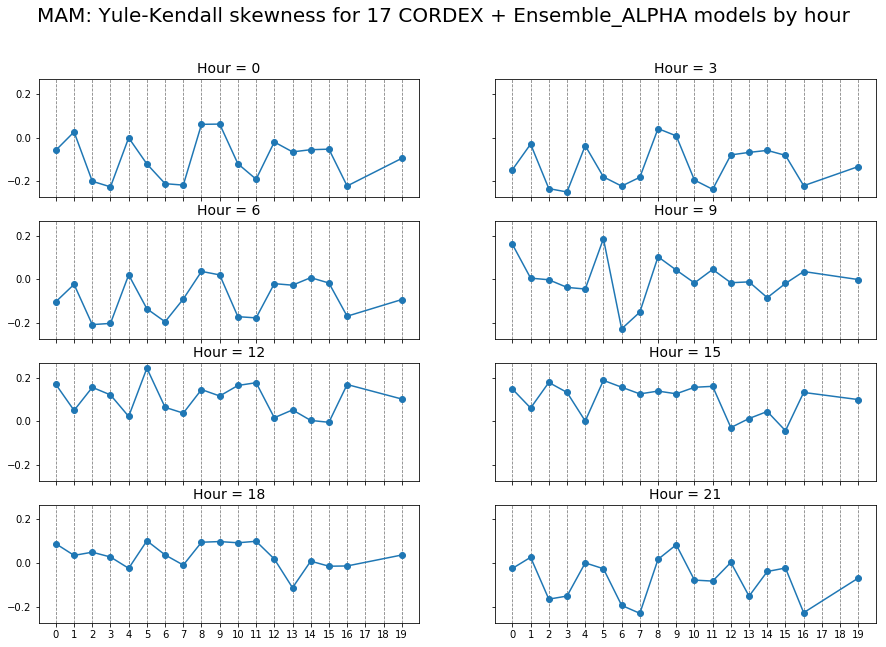

..\plots\output\metrics_ensembles


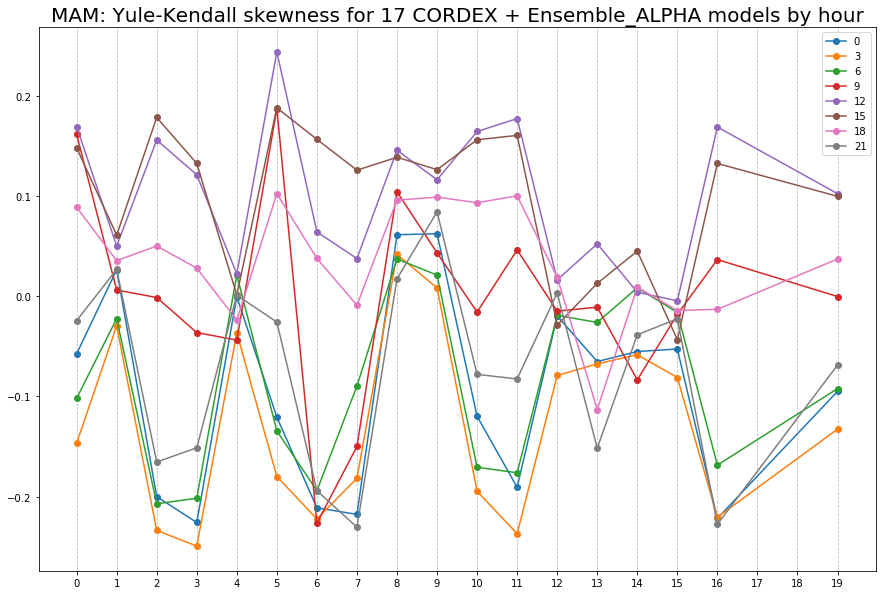

In [19]:
metrics_models_ensemblesALPHA('cordex_join_obs_mam.csv', 'MAM', cordex_output_path, 'CORDEX',
                             models_cols, temp_obs_col, ens_alpha_col,
                             plot=True, sub_folder='metrics_ensembles');

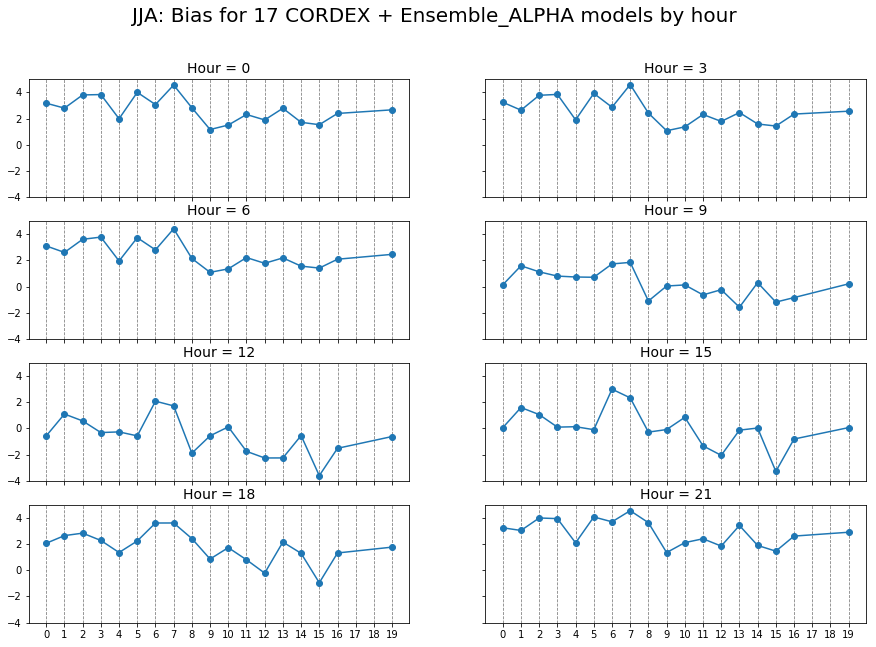

..\plots\output\metrics_ensembles


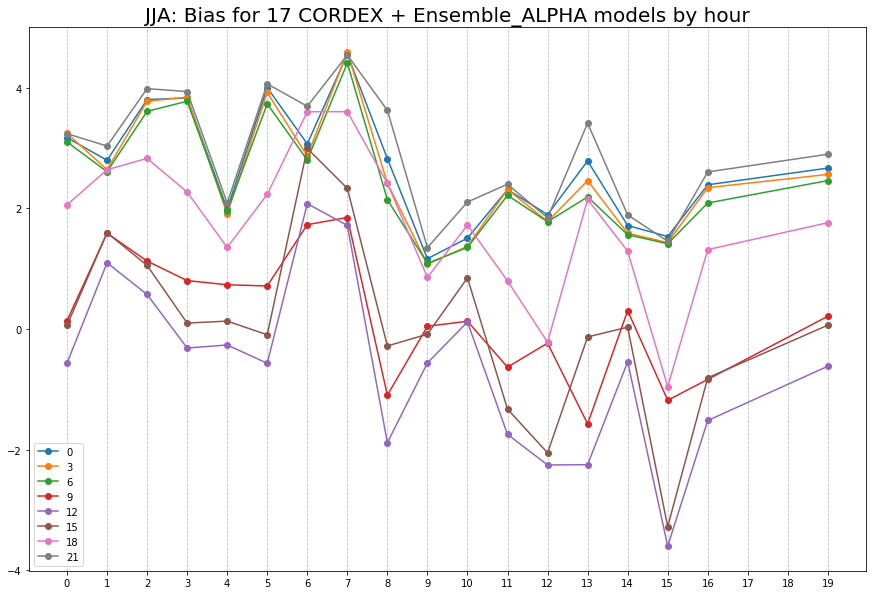

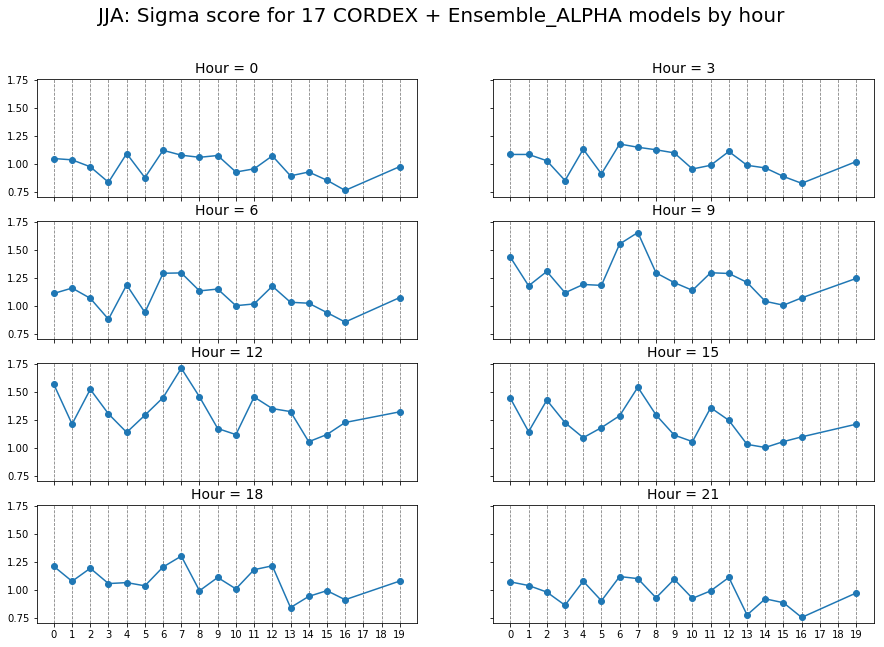

..\plots\output\metrics_ensembles


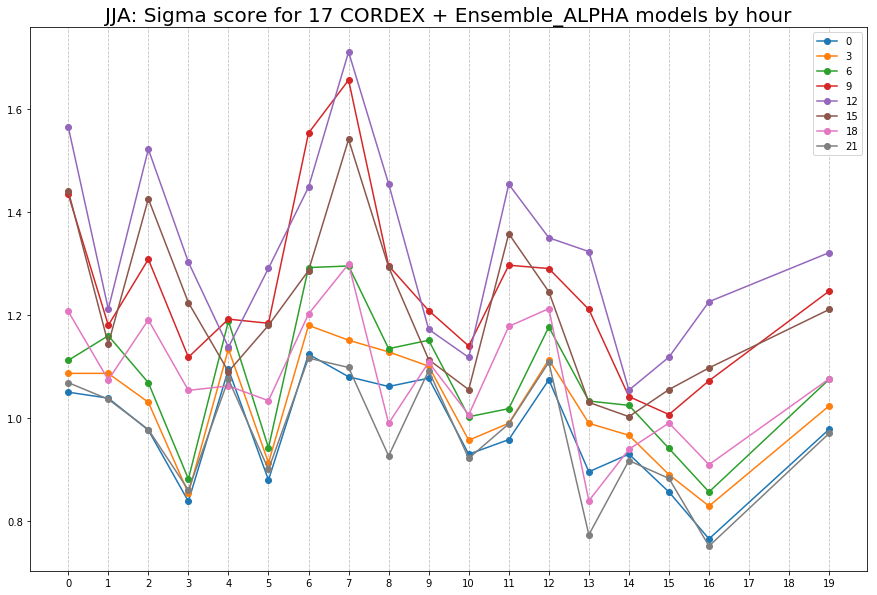

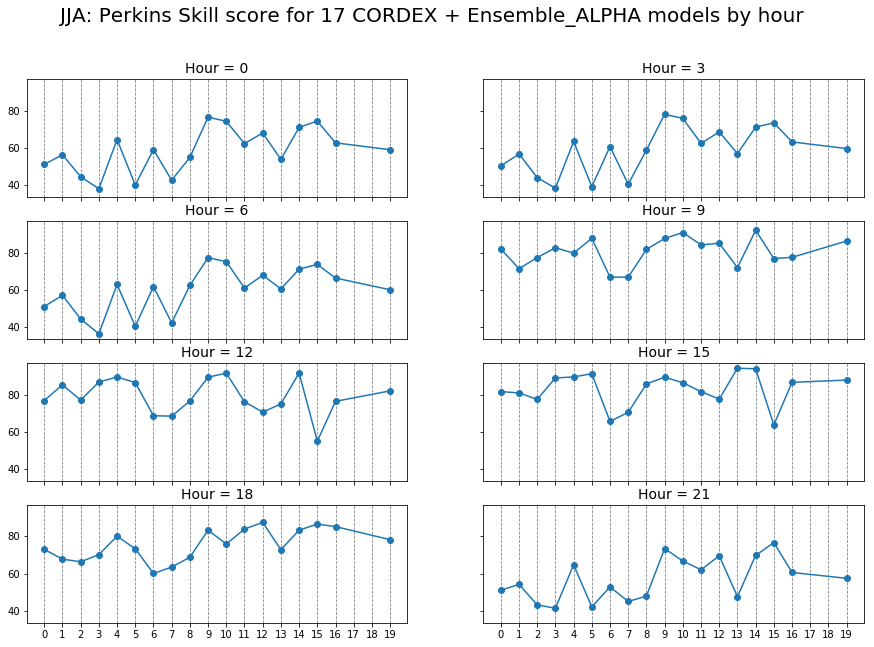

..\plots\output\metrics_ensembles


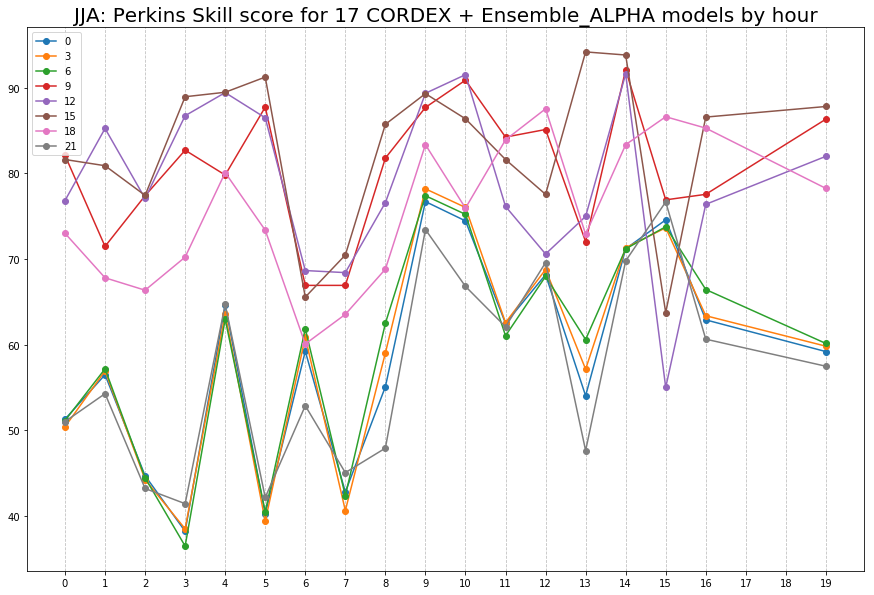

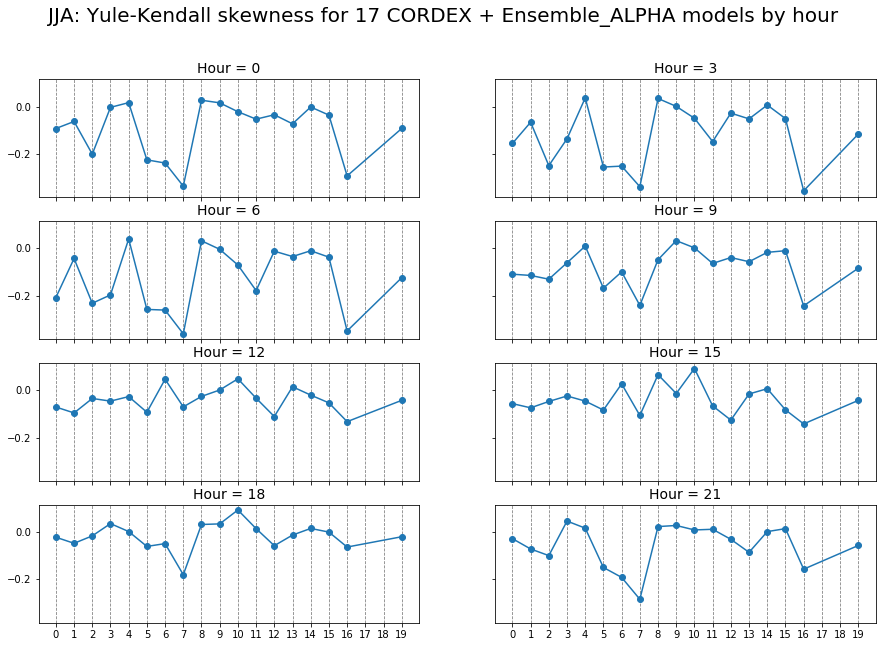

..\plots\output\metrics_ensembles


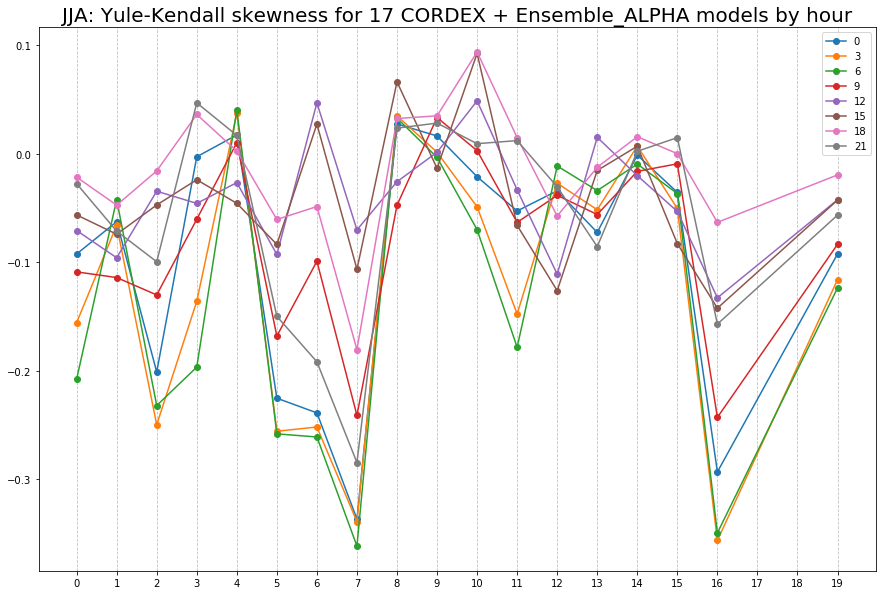

In [20]:
metrics_models_ensemblesALPHA('cordex_join_obs_jja.csv', 'JJA', cordex_output_path, 'CORDEX',
                             models_cols, temp_obs_col, ens_alpha_col,
                             plot=True, sub_folder='metrics_ensembles');

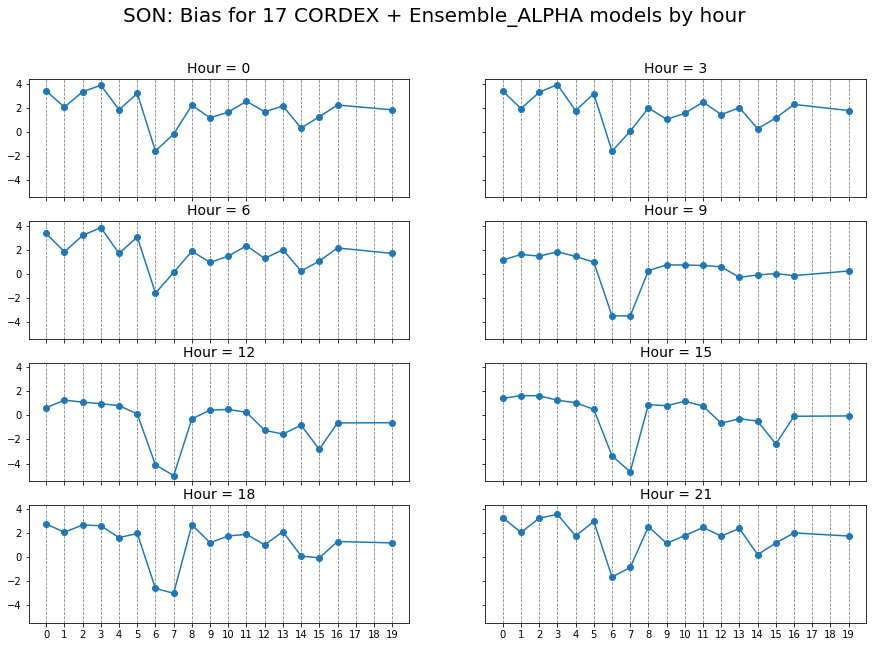

..\plots\output\metrics_ensembles


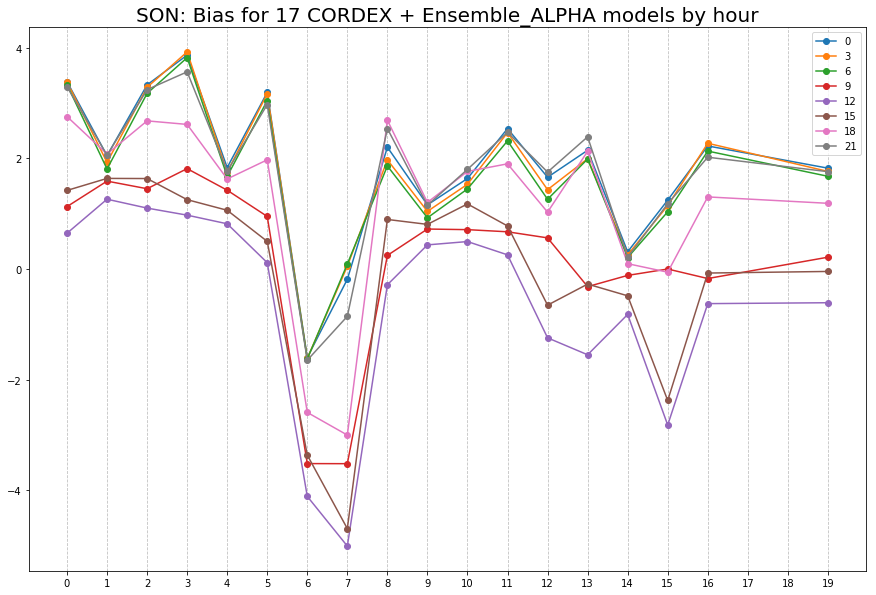

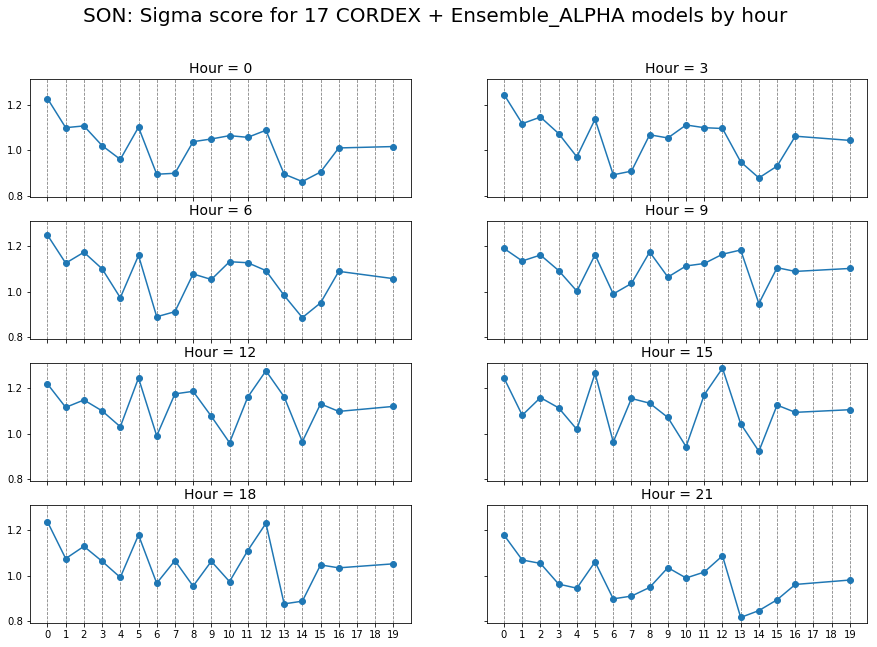

..\plots\output\metrics_ensembles


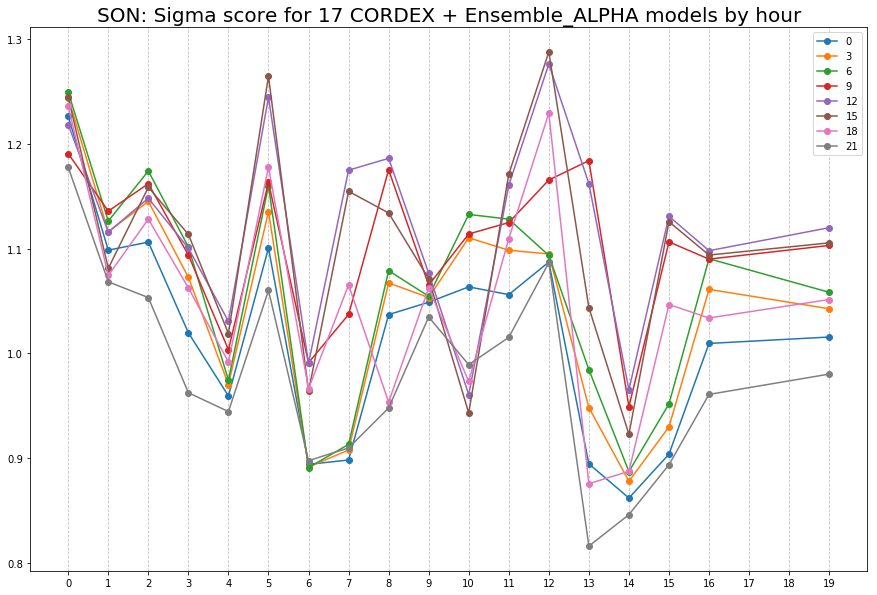

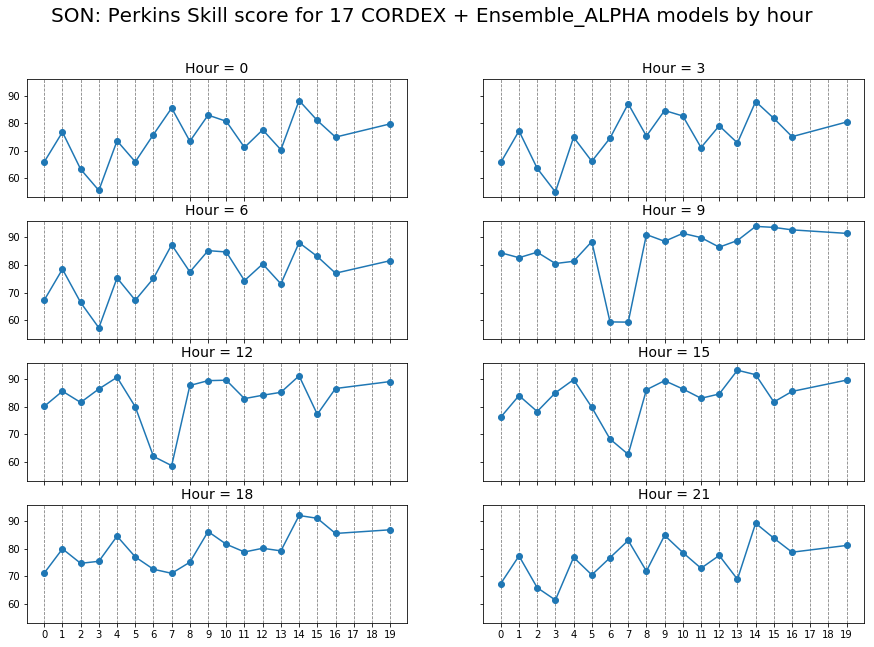

..\plots\output\metrics_ensembles


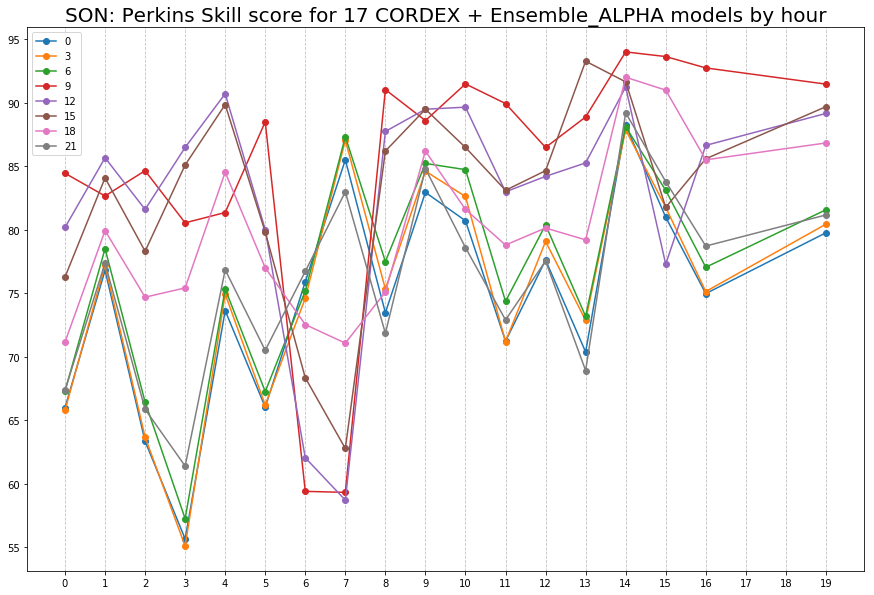

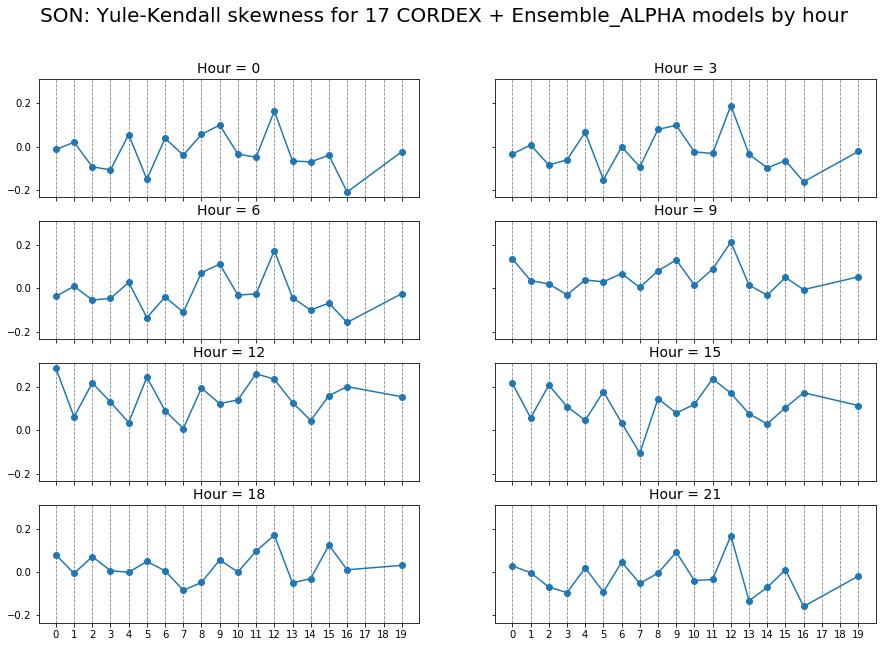

..\plots\output\metrics_ensembles


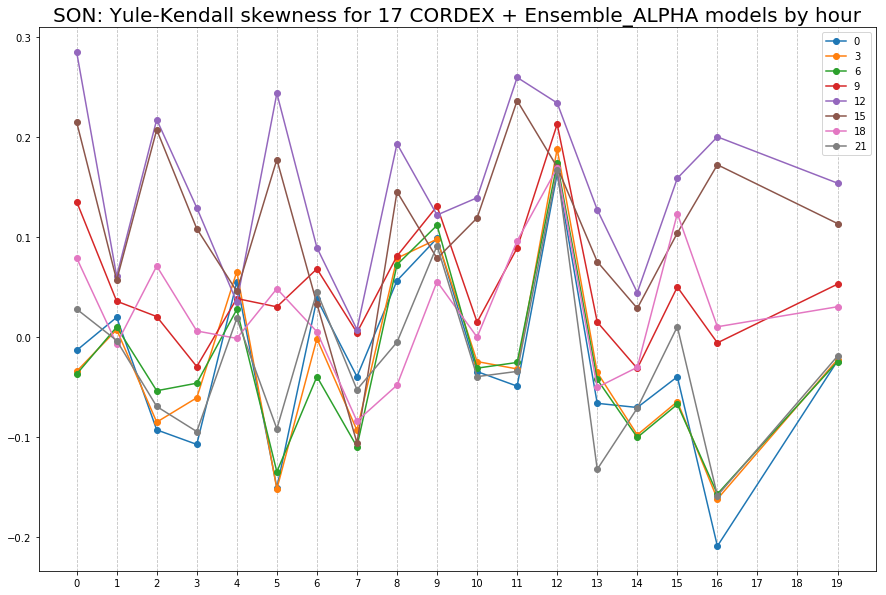

In [21]:
metrics_models_ensemblesALPHA('cordex_join_obs_son.csv', 'SON', cordex_output_path, 'CORDEX',
                             models_cols, temp_obs_col, ens_alpha_col,
                             plot=True, sub_folder='metrics_ensembles');